# Exploration

A quick test exploration for the fashion mnist test dataset...

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
# pytorch
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
# merge and concat dataset
trdf = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
tdf = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')
trdf['fold'] = 0
tdf['fold'] = 1
df = pd.concat([trdf, tdf], ignore_index=True).reset_index(drop=True)
df['ID'] = df.index

In [3]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,fold,ID
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,0,0,0,0,0,0,0,5,0,...,0,30,43,0,0,0,0,0,0,2
3,0,0,0,0,1,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,14,20,0,0,1,0,0,0,1,69995
69996,6,0,0,0,0,0,0,0,0,0,...,0,2,52,23,28,0,0,0,1,69996
69997,8,0,0,0,0,0,0,0,0,0,...,172,182,199,222,42,0,1,0,1,69997
69998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,69998


In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Counts

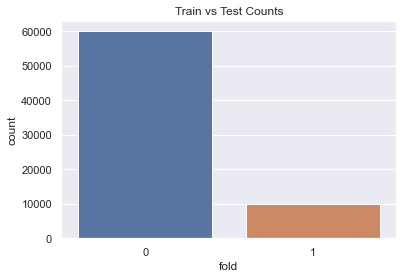

In [5]:
ax = sns.countplot(data=df, x='fold').set(title='Train vs Test Counts')

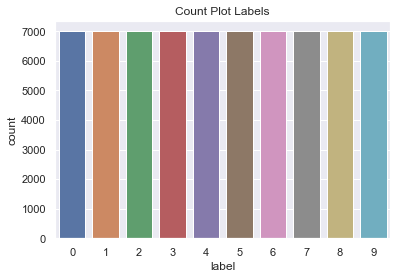

In [6]:
ax = sns.countplot(data=df, x='label').set(title='Count Plot Labels')

# Data

Example of data from our dataset...

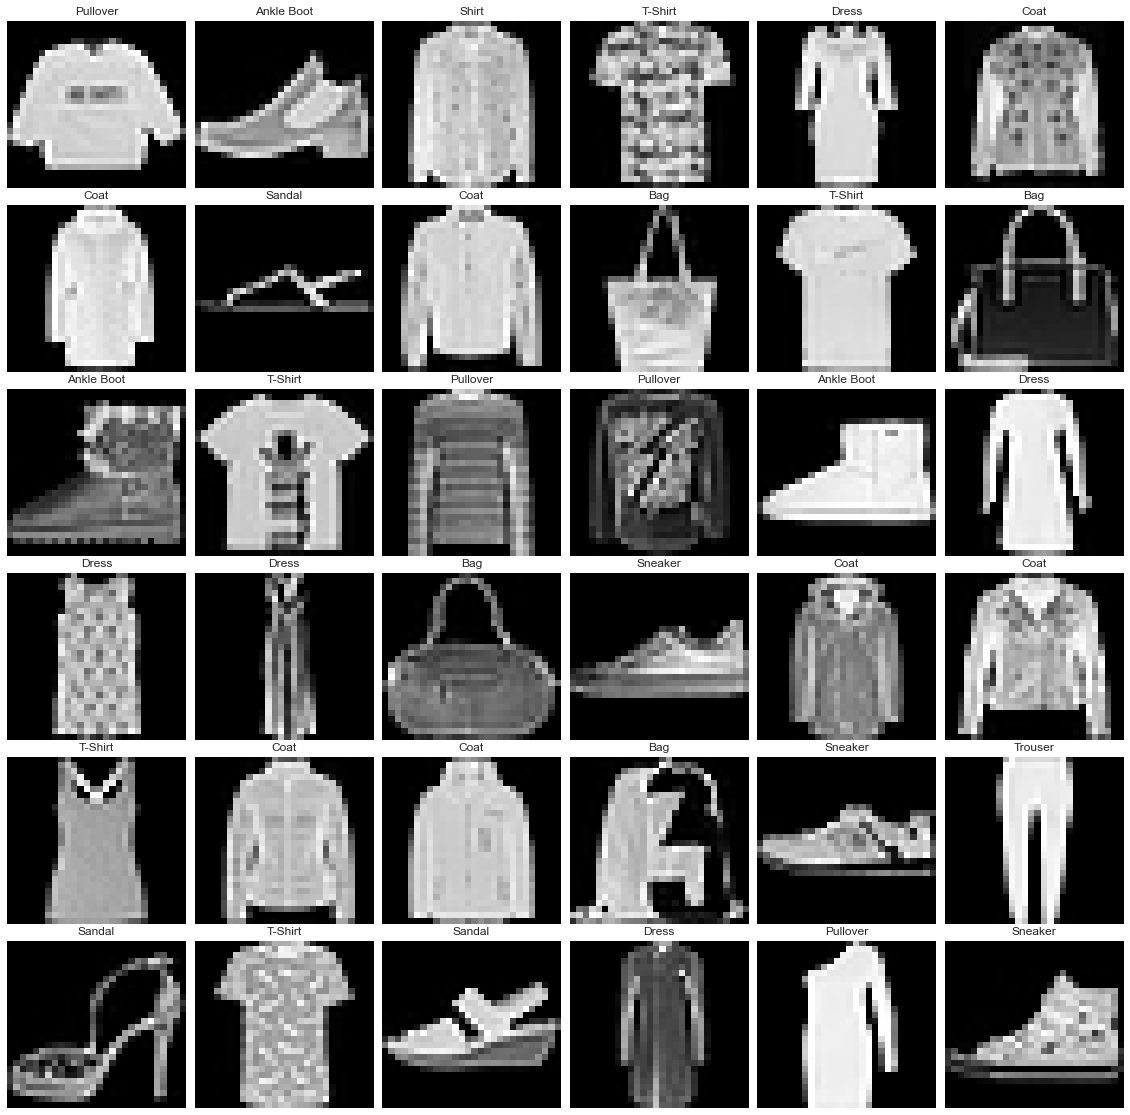

In [7]:
images = [df.iloc[i, 1:-2].values.reshape((1,28,28)) for i in range(36)]
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20,20))
for idx, image in enumerate(images):
    row = idx // 6
    col = idx % 6
    axes[row, col].axis("off")
    axes[row, col].imshow(image[0], cmap="gray", aspect="auto")
    axes[row, col].set_title(labels_map[df.iloc[idx, 0]])
plt.subplots_adjust(wspace=.05, hspace=.1)
plt.show()

# Dataset

In [8]:
# ids for train and test dataset
val_fold = 1
train_ids = df[df.fold != val_fold].ID.values
test_ids = df[df.fold == val_fold].ID.values

In [9]:
class FMNIST(Dataset):
    def __init__(self, df, ids, transform=None):
        self.ids = ids
        self.transform = transform
        self.df = df
        
    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        # image_id
        image_id = self.ids[idx]
        record = self.df[self.df['ID']==image_id]
        # image        
        image = record.values[0][1:-2].reshape((1,28,28))
        # label
        label = record.label.values[0]
        # transforms
        if self.transform:
            image = self.transform(image)
        return image, label

In [10]:
# Test
train_dataset = FMNIST(df, train_ids, transform=None)

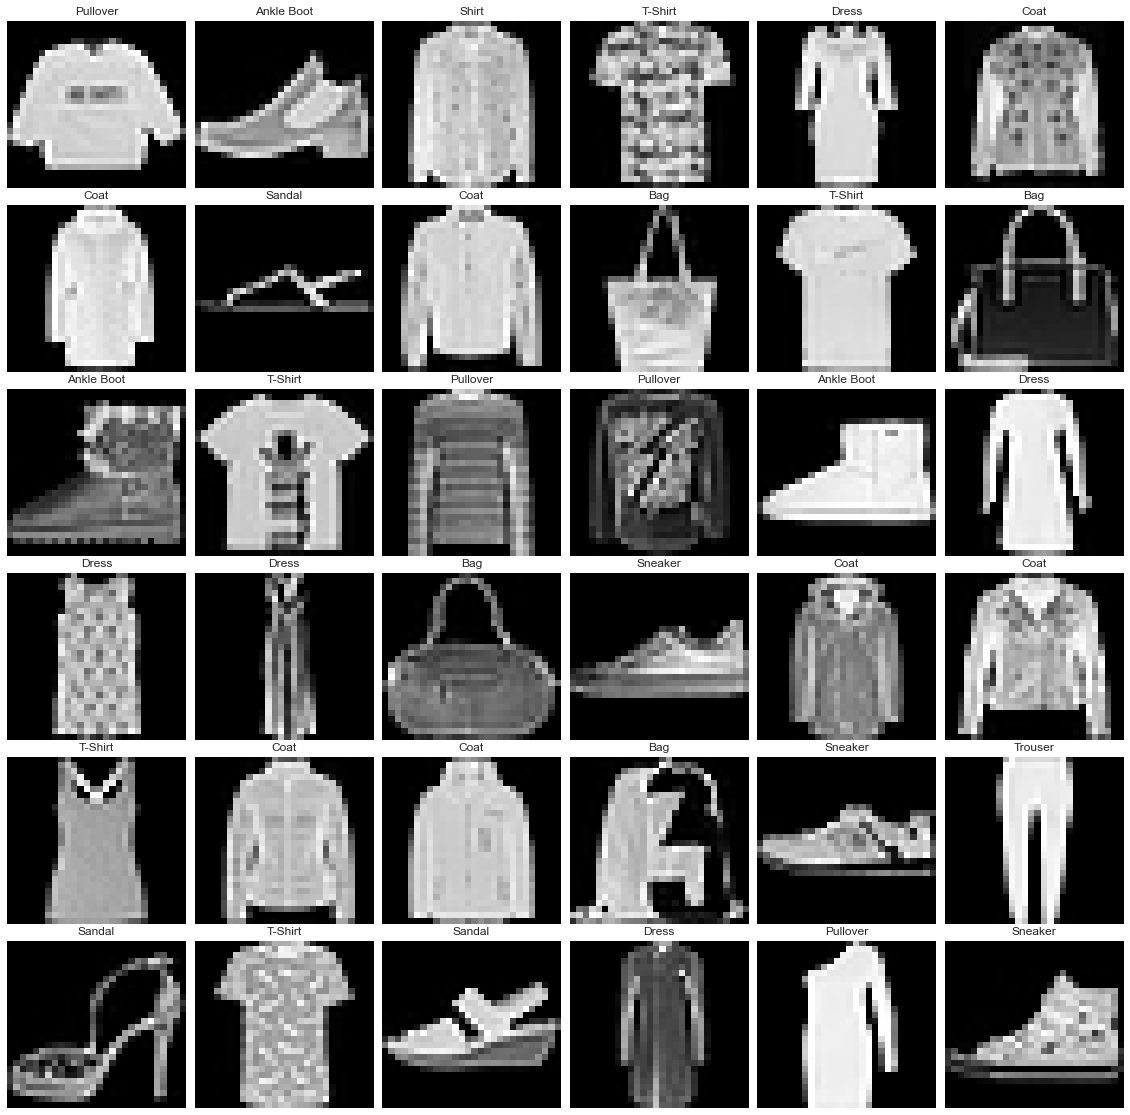

In [11]:
images = [train_dataset[i][0] for i in range(36)]
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20,20))
for idx, image in enumerate(images):
    row = idx // 6
    col = idx % 6
    axes[row, col].axis("off")
    axes[row, col].imshow(image[0], cmap="gray", aspect="auto")
    axes[row, col].set_title(labels_map[df.iloc[idx, 0]])
plt.subplots_adjust(wspace=.05, hspace=.1)
plt.show()

# Dataloader

Within collate_fn in Dataloder from PyTorch, it will automatically collate data to tensor format...

In [19]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
x, y = next(iter(train_dataloader))

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


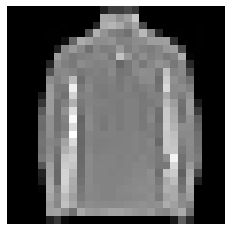

Label: 2
String Label: Pullover


In [26]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()
print(f"Label: {label}")
print(f"String Label: {labels_map[label.item()]}")

# Save

In [27]:
df.to_csv('../input/fashionmnist/df.csv', index=False)